# <a name="0"> Clustering for Marketing Strategy💹 </a>

## <a name="0">Import Libraries</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = (8, 6);

##  <a name="1">Read the dataset</a>

First I dowmload the data set from this link https://www.kaggle.com/datasets/arjunbhasin2013/ccdata
then import it in python.

In [2]:
#read the data

data_path = "/kaggle/input/ccdata/CC GENERAL.csv"  
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


- **CUST_ID** : Identification of Credit Card holder (Categorical)
- **BALANCE** : Balance amount left in their account to make purchases (
- **BALANCE_FREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- **PURCHASES** : Amount of purchases made from account
- **ONEOFF_PURCHASES** : Maximum purchase amount done in one-go
- **INSTALLMENTS_PURCHASES** : Amount of purchase done in installment
- **CASH_ADVANCE** : Cash in advance given by the user
- **PURCHASES_FREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- **ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- **PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- **CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid
- **CASHADVANCETR** : Number of Transactions made with "Cash in Advanced"
- **PURCHASES_TRX** : Numbe of purchase transactions made
- **CREDIT_LIMIT** : Limit of Credit Card for user
- **PAYMENTS** : Amount of Payment done by user
- **MINIMUM_PAYMENTS** : Minimum amount of payments made by user
- **PRCFULLPAYMENT** : Percent of full payment paid by user
- **TENURE** : Tenure of credit card service for user

##  <a name="2">Data investigation</a>


## Info about each column 

In [4]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Check Nan Values

In [5]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

## Summary Statistics

In [6]:
# This will print basic statistics for numerical columns
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Check Duplicates

In [7]:
df.duplicated().sum()

0

## Univarite Analysis

In [8]:
# unique values in each column
for column in df.columns:
    print(f'{column}: {df[column].nunique()}')
    print('*'*50)

CUST_ID: 8950
**************************************************
BALANCE: 8871
**************************************************
BALANCE_FREQUENCY: 43
**************************************************
PURCHASES: 6203
**************************************************
ONEOFF_PURCHASES: 4014
**************************************************
INSTALLMENTS_PURCHASES: 4452
**************************************************
CASH_ADVANCE: 4323
**************************************************
PURCHASES_FREQUENCY: 47
**************************************************
ONEOFF_PURCHASES_FREQUENCY: 47
**************************************************
PURCHASES_INSTALLMENTS_FREQUENCY: 47
**************************************************
CASH_ADVANCE_FREQUENCY: 54
**************************************************
CASH_ADVANCE_TRX: 65
**************************************************
PURCHASES_TRX: 173
**************************************************
CREDIT_LIMIT: 205
***********************

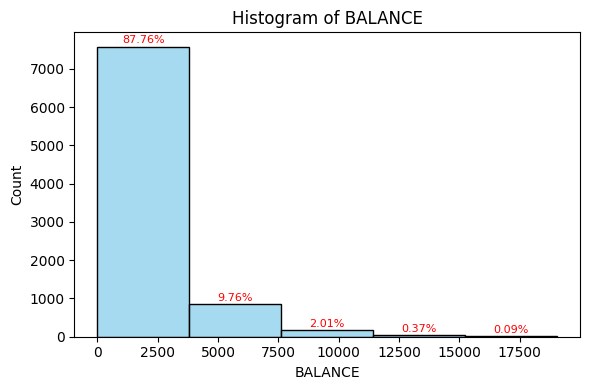

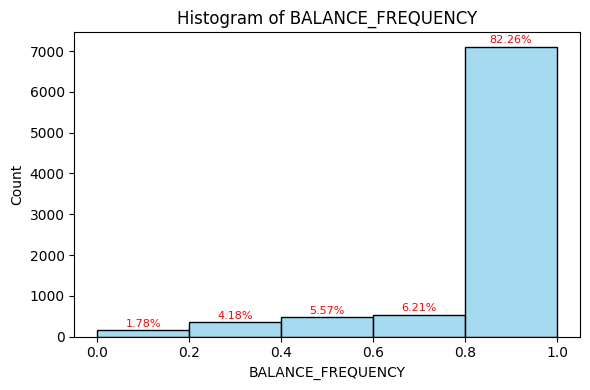

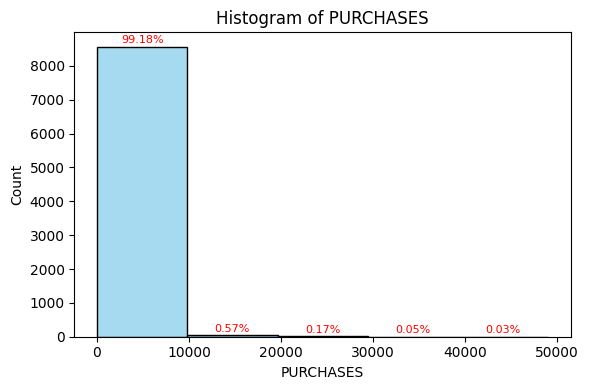

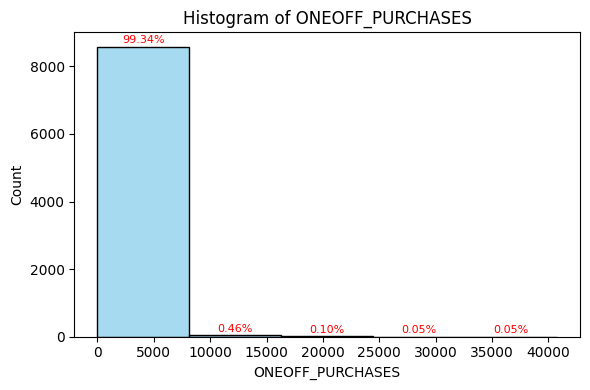

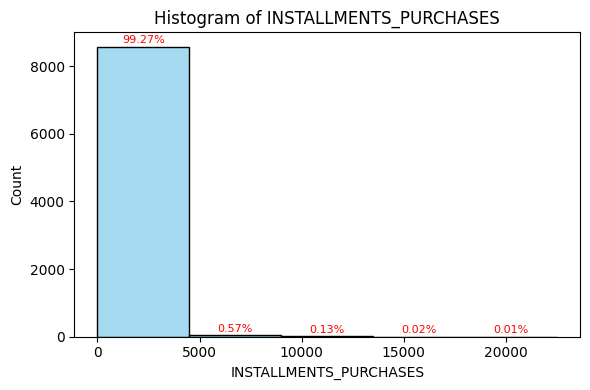

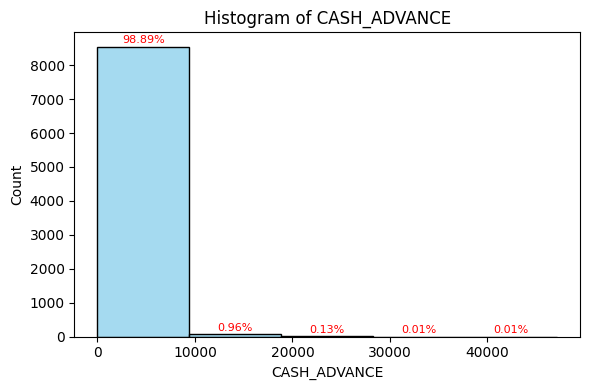

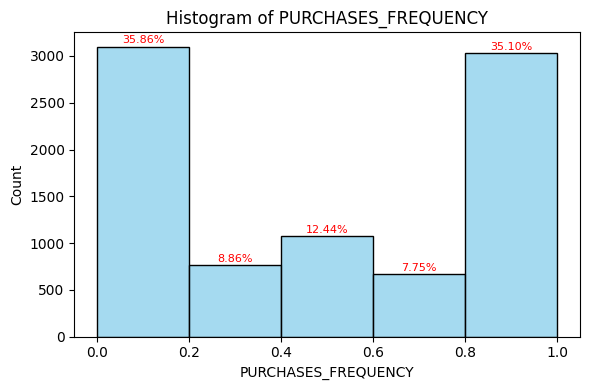

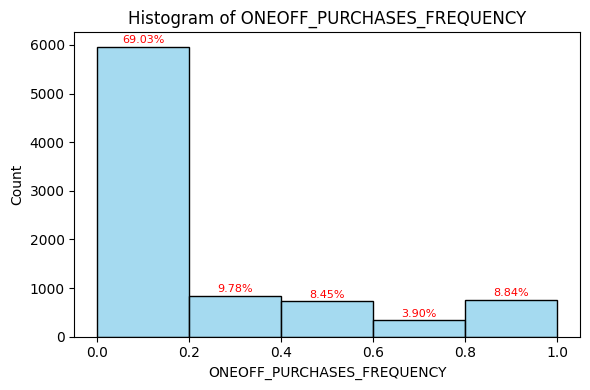

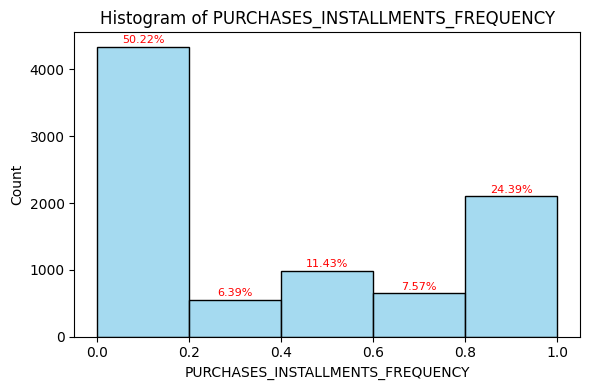

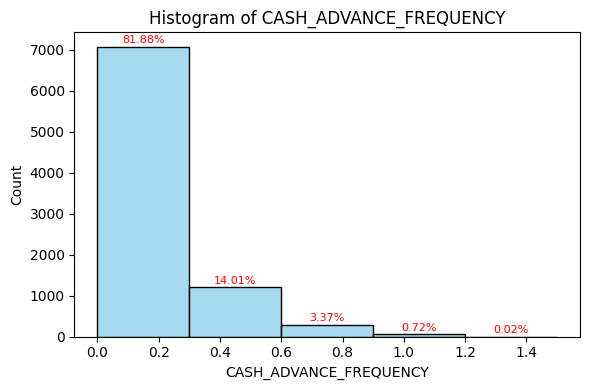

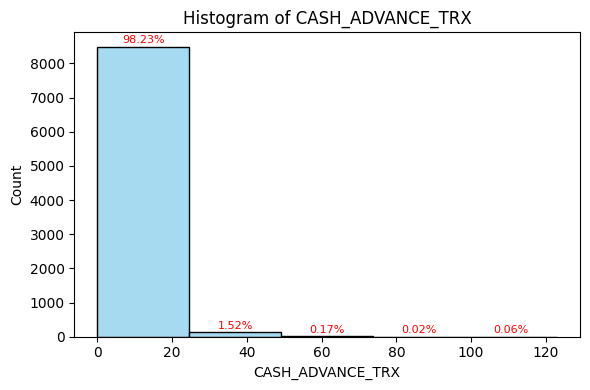

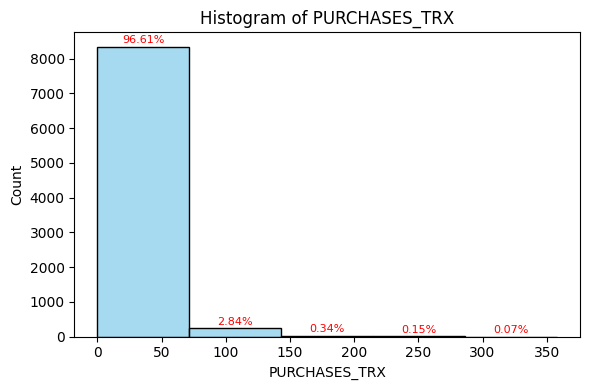

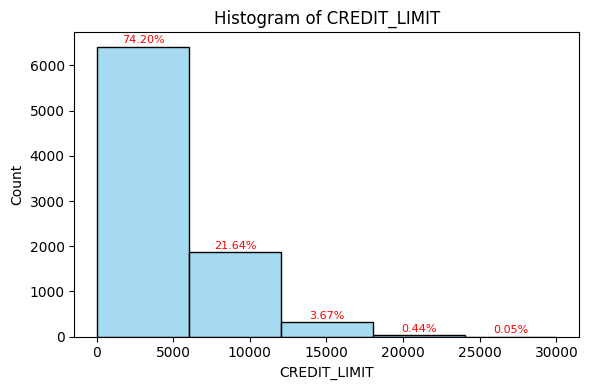

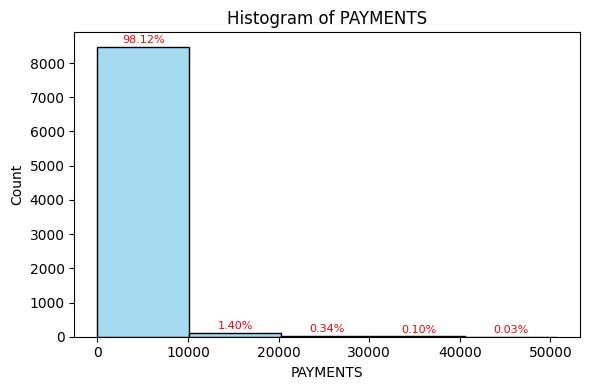

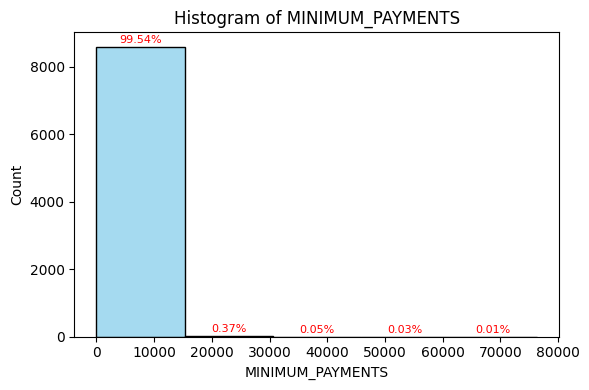

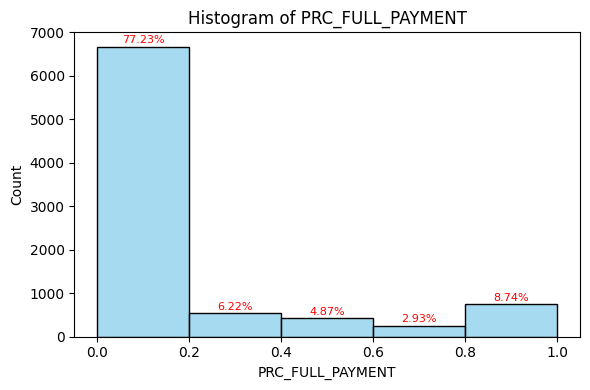

In [9]:
columns_of_interest = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'] 
selected_data = df[columns_of_interest].dropna()

# Plot histograms for each selected column individually
for column in columns_of_interest:
    plt.figure(figsize=(6, 4))
    sns.histplot(selected_data[column], bins=5, kde=False, color='skyblue', edgecolor='black')
    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    plt.title(f'Histogram of {column}')

    # Calculate the percentage of data points in each bin
    counts, bins = np.histogram(selected_data[column], bins=5)
    percentages = (counts / len(selected_data[column])) * 100

    # Annotate each bin with the percentage value
    for count, bin_edge, percentage in zip(counts, bins[:-1], percentages):
        plt.annotate(f'{percentage:.2f}%', xy=(bin_edge + np.diff(bins)[0] / 2, count), xytext=(0, 1),
                     textcoords='offset points', ha='center', va='bottom', fontsize=8, color='red')

    plt.tight_layout()
    plt.show()

# Insights from these features in graph

## Account Balances:
- **87.76\% of customers** maintain account balances not exceeding \$3750, indicating a trend towards conservative spending habits and financial prudence.

## Balance Update Frequency:
- Most customers have their account balances updated frequently, reflecting a proactive approach to monitoring financial status and staying informed about credit card activity.

## Purchase Behavior:
- **99\% of customers** make purchases and the highest single purchase under \$10,000, suggesting a preference for moderate spending habits.
- **Most customers (99\%)** prefer purchases made in installments, with the majority opting for purchases under \$5000, indicating a preference for budget-friendly spending and manageable repayment plans.

## Purchase Frequency:
- **35\% of customers** make purchases frequently, while an equal percentage make purchases infrequently, demonstrating varied spending habits among customers.

## One-Go Purchases:
- The majority of customers (78\%) do not prefer to make purchases frequently in one-go, suggesting a preference for smaller, more frequent transactions.

## Installment Purchases:
- **56\% of customers** do not prefer to make purchases with installments frequently, while 24\% prefer frequent installment purchases, reflecting a diverse range of preferences among customers regarding payment methods.

## Cash Advance Usage:
- **95\% of customers** do not prefer to pay frequently in cash advance, indicating a general avoidance of cash advance transactions.
- However, **99\% of customers** have made a number of transactions with cash in advance, with transaction volumes ranging from 0 to 50, suggesting occasional use or emergency financial needs.

## Purchase Transactions:
- **96\% of customers** have a number of purchase transactions made, with volumes ranging from 0 to 70, indicating varying levels of purchasing activity among customers.

## Credit Card Limits:
- **74\% of customers** have credit card limits not exceeding \$6000, indicating a preference for moderate credit limits among the majority of customers.

## Payment Behavior:
- The total amount of payments made by the user is under \$10,000 for **98\% of customers**, suggesting responsible credit management practices and conservative payment behavior.
- Most customers have minimum payments under \$15,000, indicating a tendency towards managing credit card debt within manageable limits.
- **74\% of customers** do not prefer to pay the full payment, reflecting a preference for partial payments or revolving credit utilization among the majority of customers.


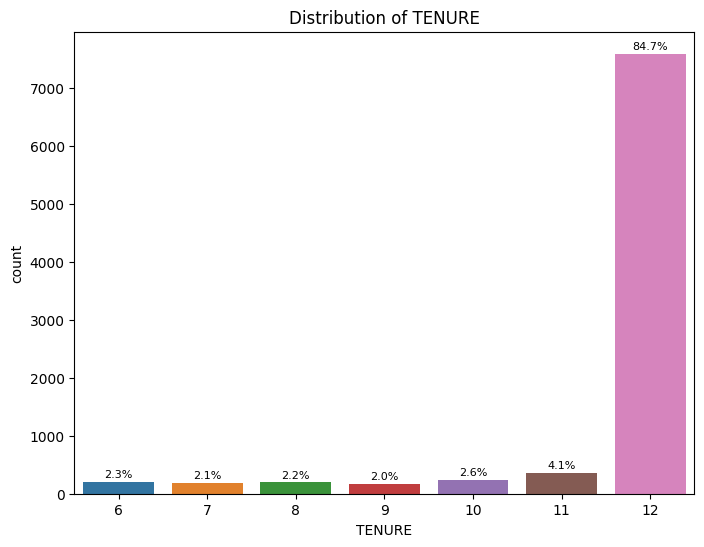

In [10]:
# Plot countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='TENURE')

# Calculate percentages
total = len(df['TENURE'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total:.1%}', 
                xy=(p.get_x() + p.get_width() / 2, height), 
                xytext=(0, 3), 
                textcoords='offset points', 
                ha='center', 
                fontsize=8)

plt.title('Distribution of TENURE')
plt.show()

###  Most customers (84\%) the tenure of credit card service are 12 months.

## Explore distribution of each column

<Figure size 800x600 with 0 Axes>

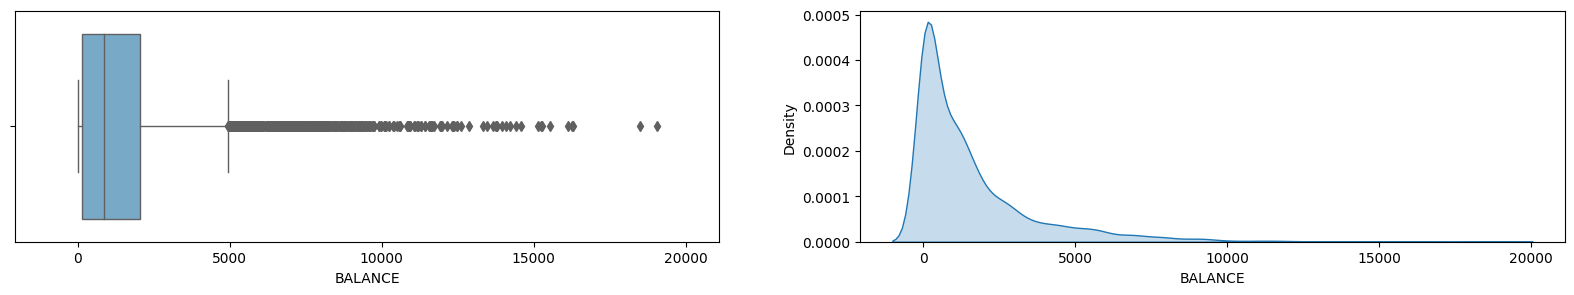

<Figure size 2000x300 with 0 Axes>

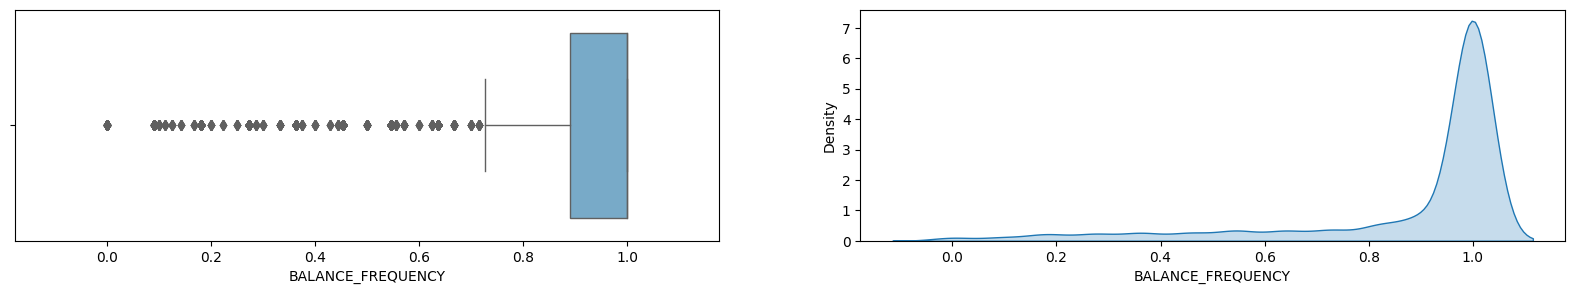

<Figure size 2000x300 with 0 Axes>

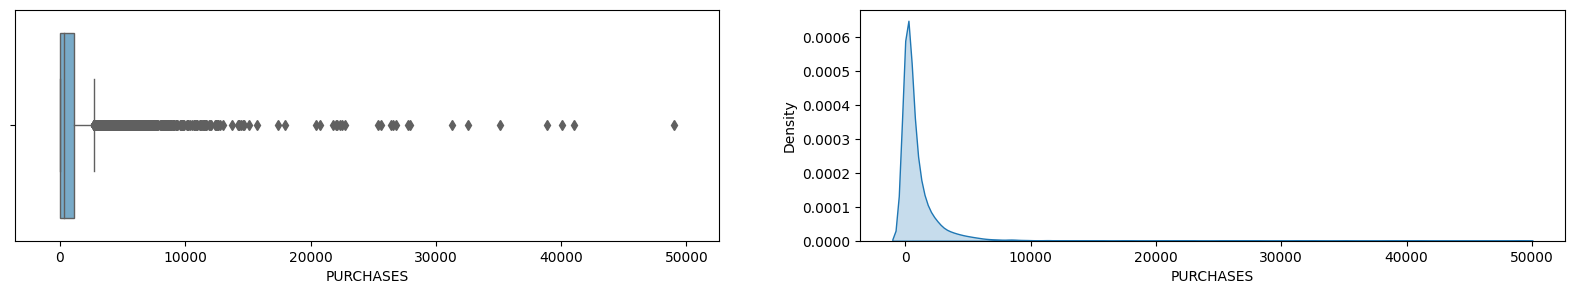

<Figure size 2000x300 with 0 Axes>

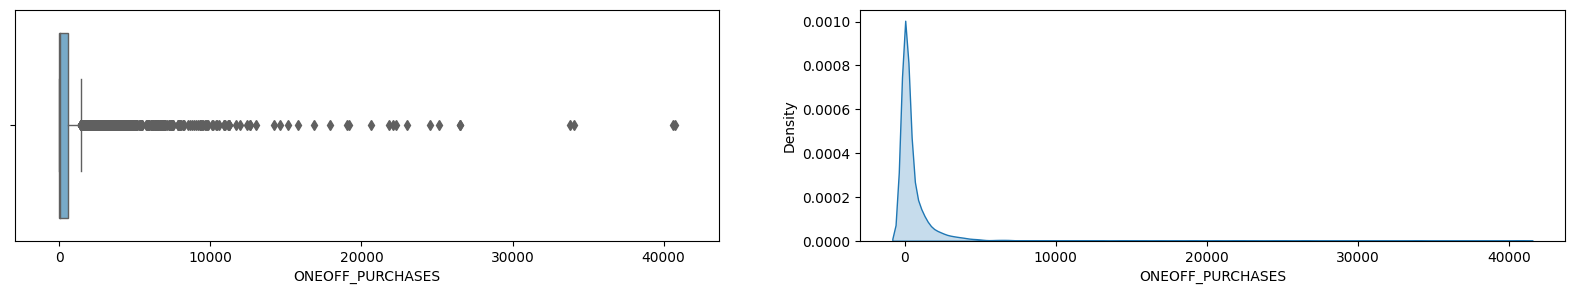

<Figure size 2000x300 with 0 Axes>

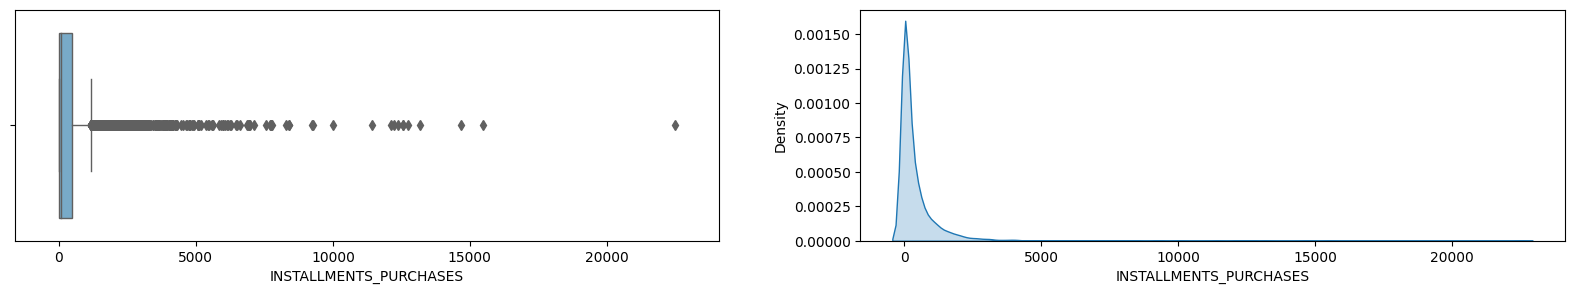

<Figure size 2000x300 with 0 Axes>

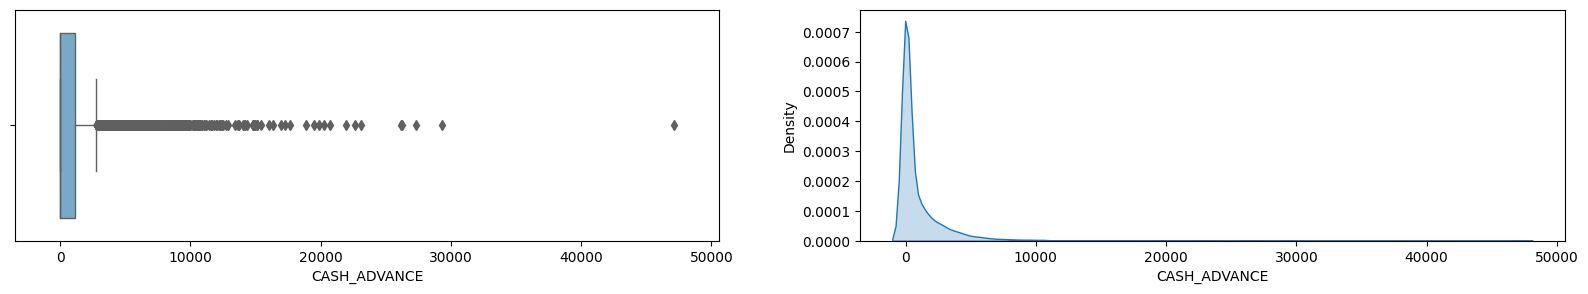

<Figure size 2000x300 with 0 Axes>

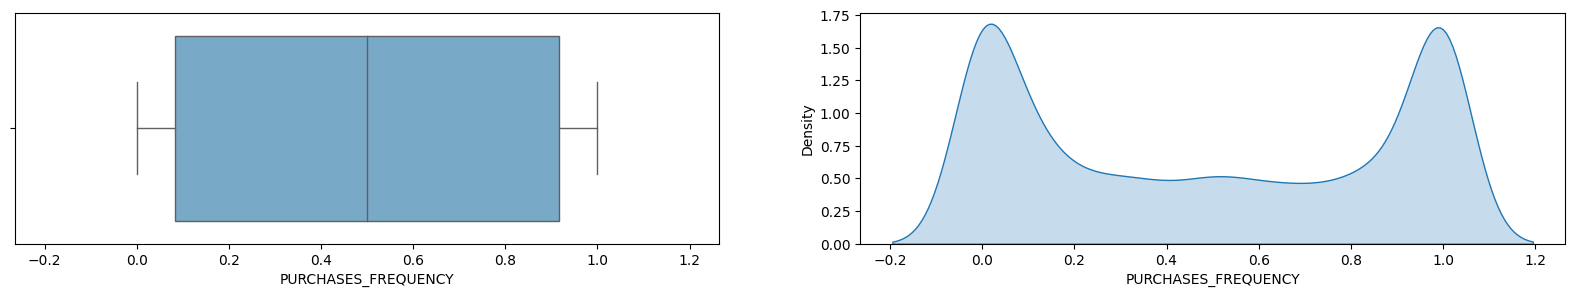

<Figure size 2000x300 with 0 Axes>

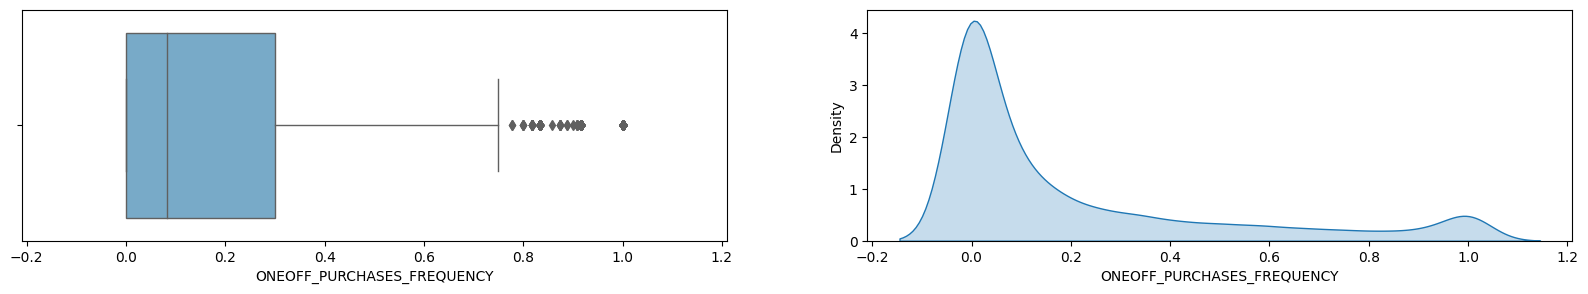

<Figure size 2000x300 with 0 Axes>

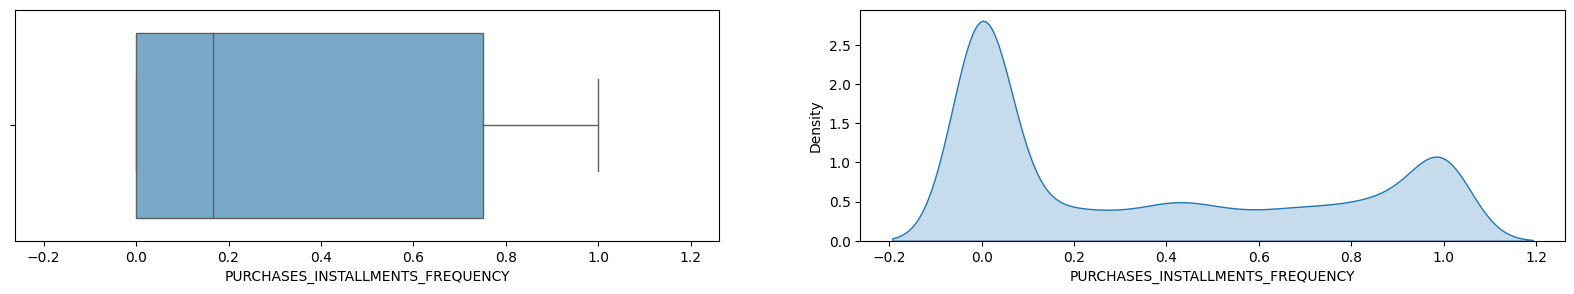

<Figure size 2000x300 with 0 Axes>

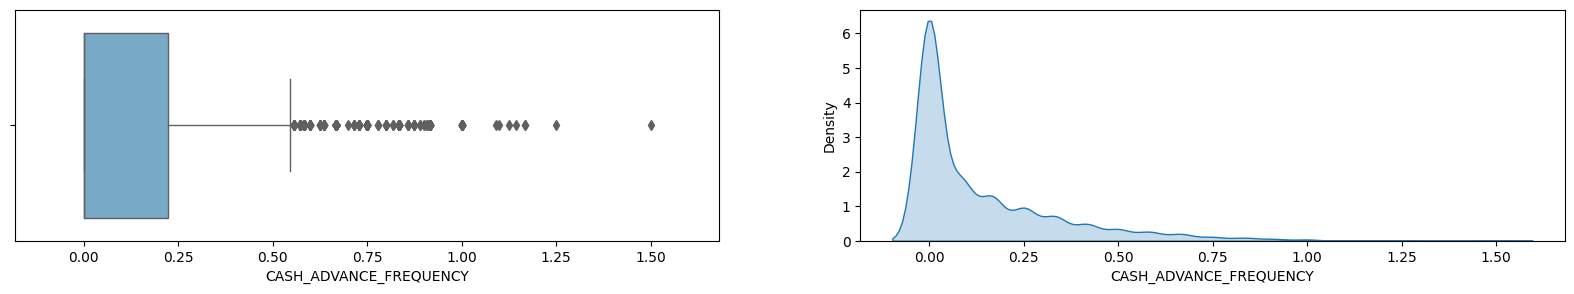

<Figure size 2000x300 with 0 Axes>

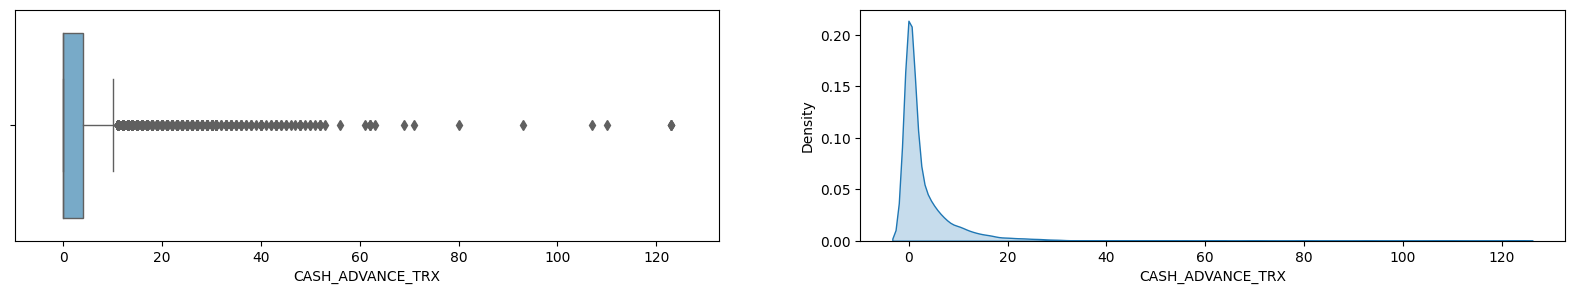

<Figure size 2000x300 with 0 Axes>

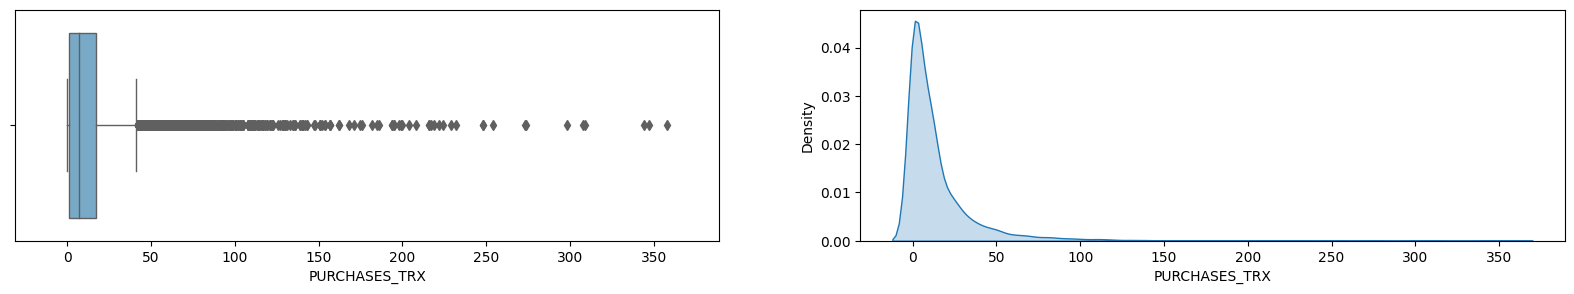

<Figure size 2000x300 with 0 Axes>

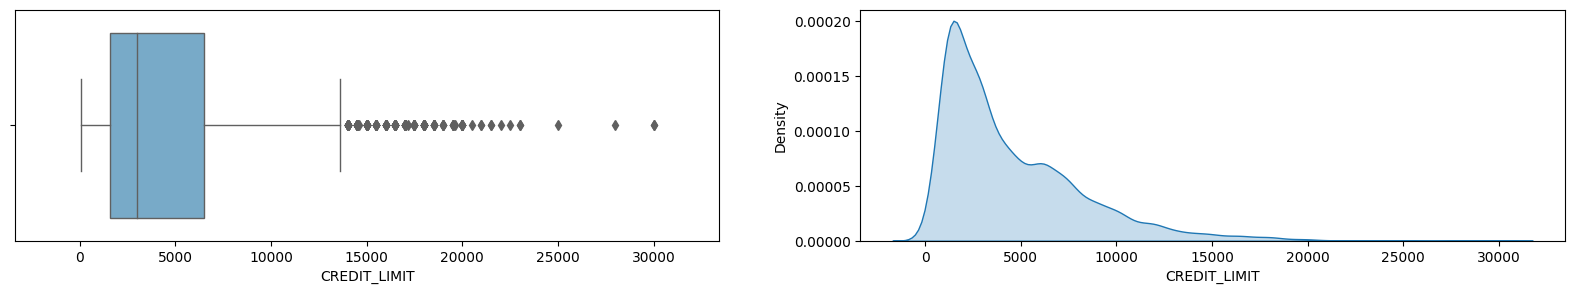

<Figure size 2000x300 with 0 Axes>

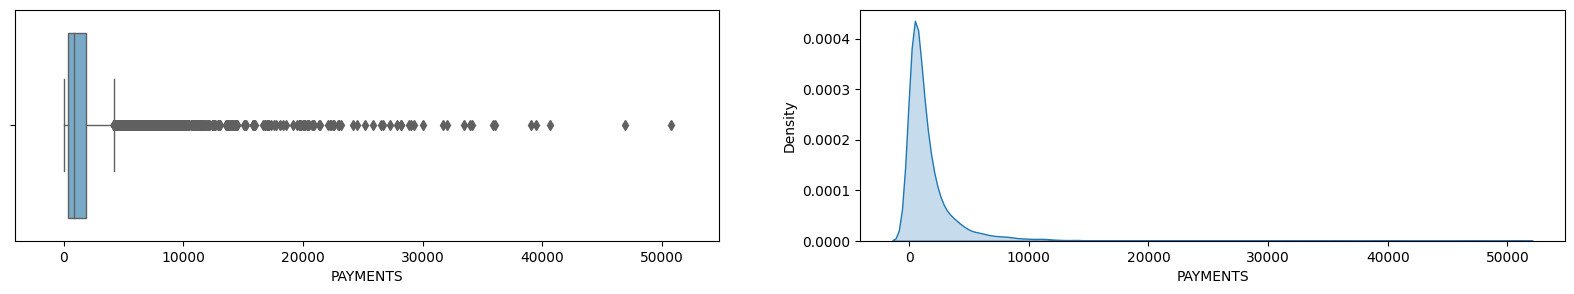

<Figure size 2000x300 with 0 Axes>

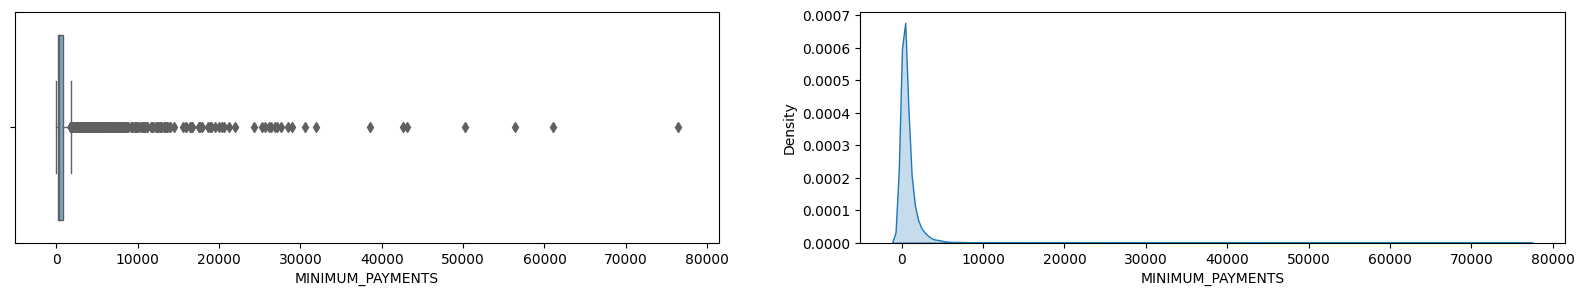

<Figure size 2000x300 with 0 Axes>

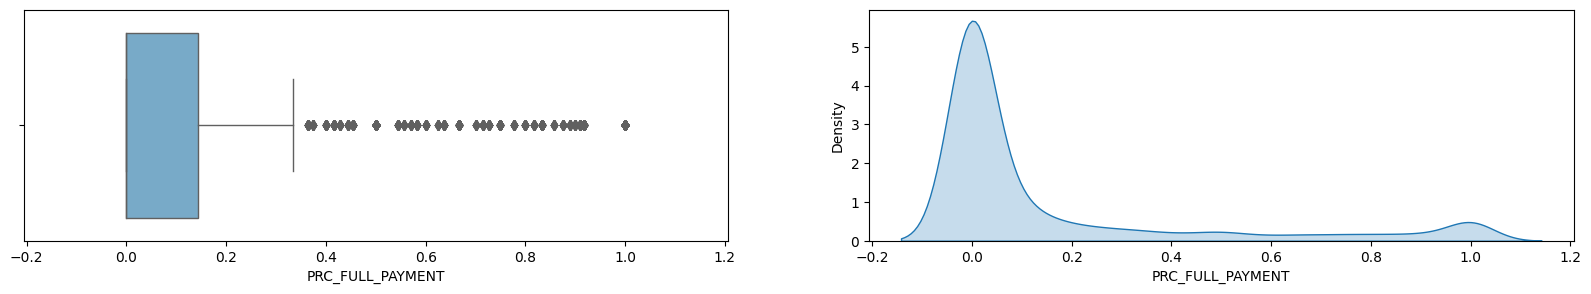

In [11]:
for col in list(df.columns)[1:]:
    if df[col].nunique() > 7:
        plt.figure();
        rcParams['figure.figsize'] = (20, 3);
        fig, (ax_box, ax_kde) = plt.subplots(ncols=2, sharex=True);
        plt.gca().set(xlabel=col, ylabel='Density');
        sns.boxplot(x = col, ax=ax_box, linewidth=1.0, palette='Blues', data=df);  # Switched x to y
        sns.kdeplot(df[col], ax=ax_kde, fill=True, palette='Blues');
        plt.show();


### Most columns are skewness and have the same distribution right skewed except 2 columns (`BALANCE_FREQUENCY`, `PURCHASES_FREQUENCY`)  

###  Correlatoin between columns

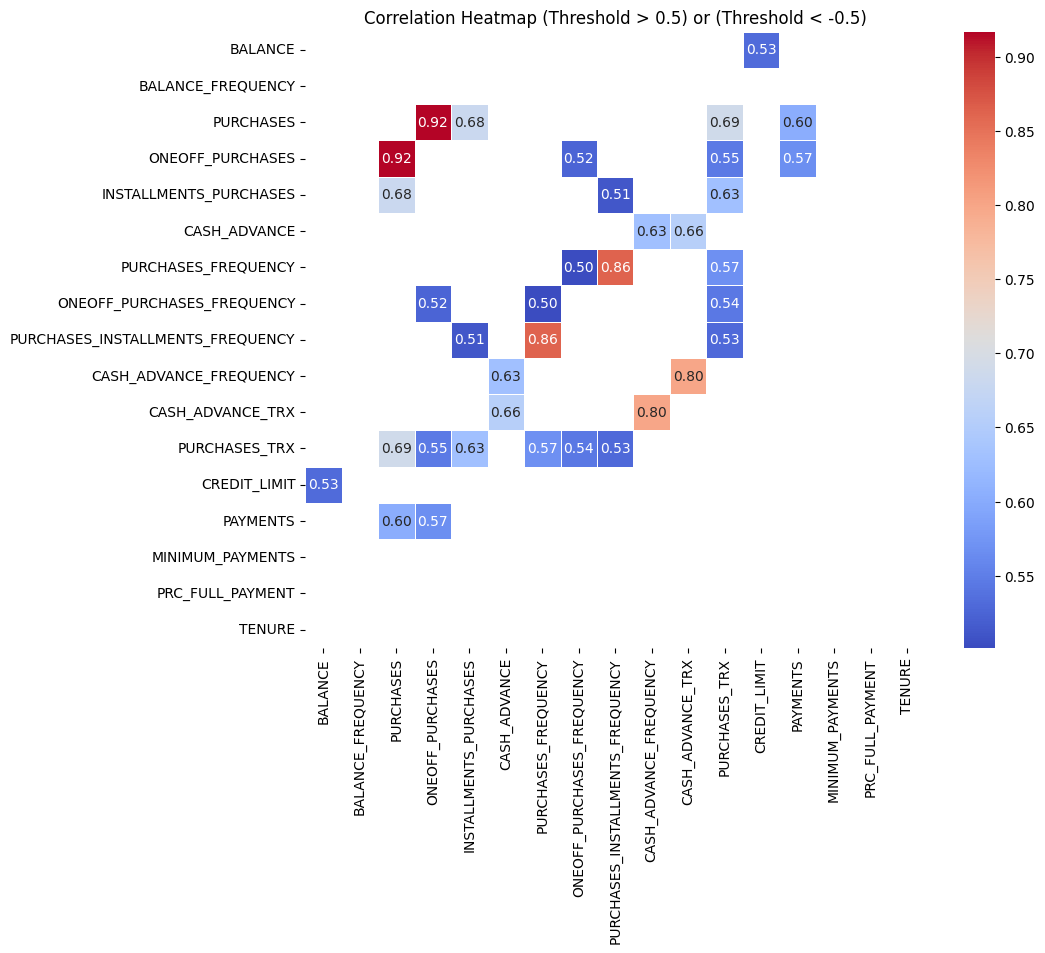

In [12]:
corr_data = df.drop(columns=['CUST_ID']) 
corr_matrix = corr_data.corr()

# Define threshold
threshold = 0.5 

# Filter correlations greater than threshold
corr_filtered = corr_matrix[((corr_matrix > threshold) & (corr_matrix < 1)) | (corr_matrix < -threshold)]

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_filtered, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Threshold > 0.5) or (Threshold < -0.5)')
plt.show()


### There are some columns correlated to each other 
- `PURCHASES_FREQUENCY`, `PURCHASES_INSTALLMENTS_FREQUENCY`
- `PURCHASES`, `ONEOFF_PURCHASES`
- `CASH_ADVANCE_TRX`, `CASH_ADVANCE_FREQUENCY` 

# <a name="3">Data preprocessing</a>

### From all the above
1- We have 2 columns contain a nan values (`CREDIT_LIMIT`, `MINIMUM_PAYMENTS`), so I will drop these rows.        <br>
2- Most columns are skewness and have the same distribution right skewed except 2 columns (`BALANCE_FREQUENCY`, `PURCHASES_FREQUENCY`), so I apply log transform to these columns         <br>
3- I will drop `CUST_ID` <br>
4- There are some columns correlated to each other. So I will drop these columns
     `PURCHASES_INSTALLMENTS_FREQUENCY` , `ONEOFF_PURCHASES`  , `CASH_ADVANCE_FREQUENCY`     <br>

In [13]:
#make a copy for the original dataset
df_copy=df.copy()

### Drop Nan Values

In [14]:
df_copy.dropna(inplace=True)

In [15]:
round(df_copy.isnull().sum(axis=0)*100/df_copy.shape[0],2)

CUST_ID                             0.0
BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

### Drop column Cust_ID

In [16]:
df_copy.drop(columns=['CUST_ID', 'PURCHASES_INSTALLMENTS_FREQUENCY',
                      'ONEOFF_PURCHASES', 'CASH_ADVANCE_FREQUENCY' ], inplace=True)

### Apply Log Transformation in skewness columns

In [17]:
df_copy.skew()

BALANCE                        2.374254
BALANCE_FREQUENCY             -2.084161
PURCHASES                      8.055789
INSTALLMENTS_PURCHASES         7.216133
CASH_ADVANCE                   5.139629
PURCHASES_FREQUENCY            0.033041
ONEOFF_PURCHASES_FREQUENCY     1.504234
CASH_ADVANCE_TRX               5.673327
PURCHASES_TRX                  4.578418
CREDIT_LIMIT                   1.507019
PAYMENTS                       5.873049
MINIMUM_PAYMENTS              13.622193
PRC_FULL_PAYMENT               1.886027
TENURE                        -3.011141
dtype: float64

- **I wil aplly log transform for all data except `PURCHASES_FREQUENCY`, `BALANCE_FREQUENCY`, `ONEOFF_PURCHASES_FREQUENCY`,and `TENURE`**

In [18]:
skewness_features = ['BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
                     'PAYMENTS', 'MINIMUM_PAYMENTS', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX']
df_copy[skewness_features] = np.log(df_copy[skewness_features] + 0.1)

In [19]:
df_copy.skew()

BALANCE                      -0.904675
BALANCE_FREQUENCY            -2.084161
PURCHASES                    -0.980708
INSTALLMENTS_PURCHASES       -0.140807
CASH_ADVANCE                  0.170686
PURCHASES_FREQUENCY           0.033041
ONEOFF_PURCHASES_FREQUENCY    1.504234
CASH_ADVANCE_TRX              0.393508
PURCHASES_TRX                -0.599293
CREDIT_LIMIT                 -0.107283
PAYMENTS                     -0.109795
MINIMUM_PAYMENTS              0.101950
PRC_FULL_PAYMENT              1.886027
TENURE                       -3.011141
dtype: float64

<Figure size 2000x300 with 0 Axes>

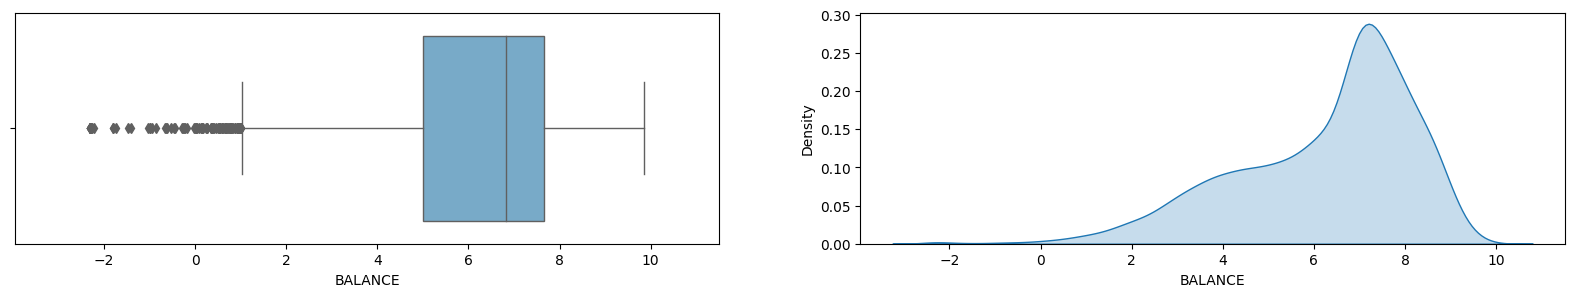

<Figure size 2000x300 with 0 Axes>

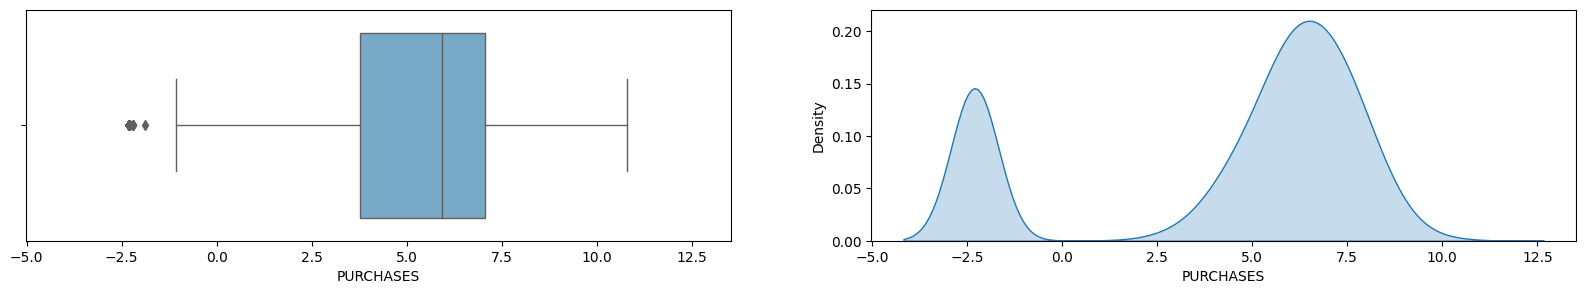

<Figure size 2000x300 with 0 Axes>

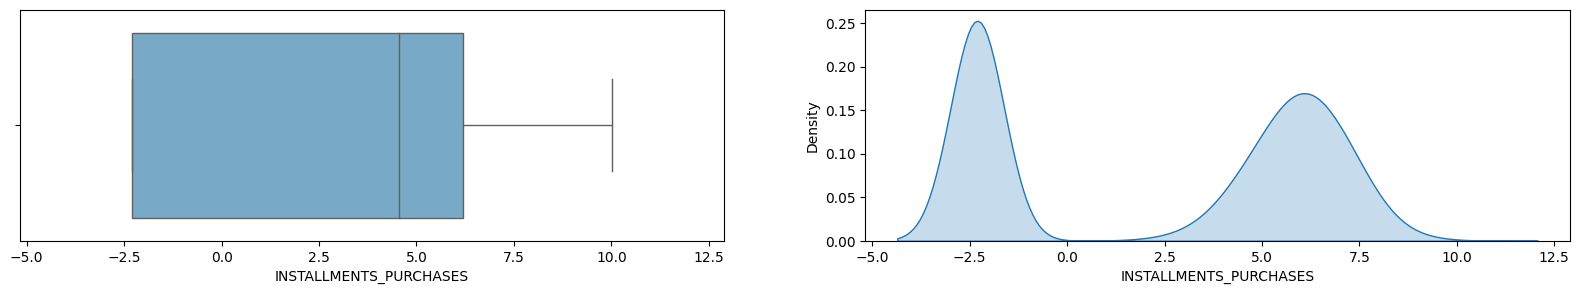

<Figure size 2000x300 with 0 Axes>

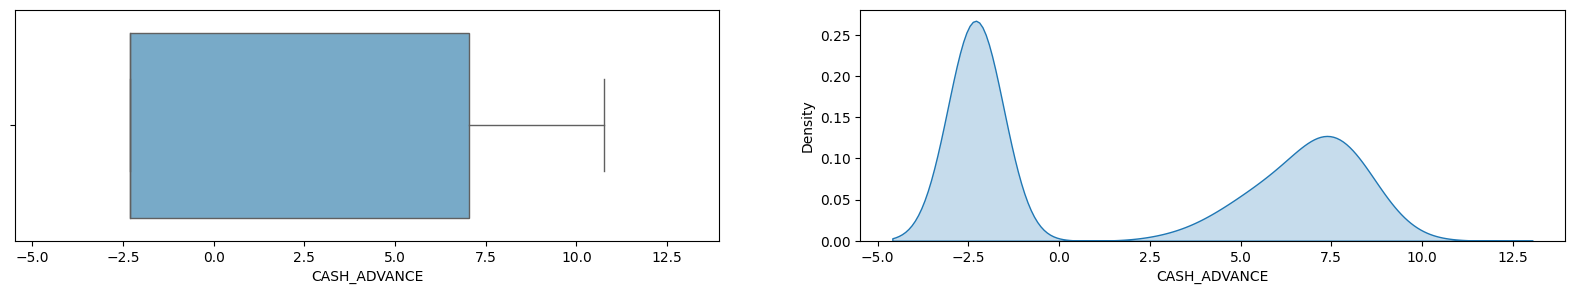

<Figure size 2000x300 with 0 Axes>

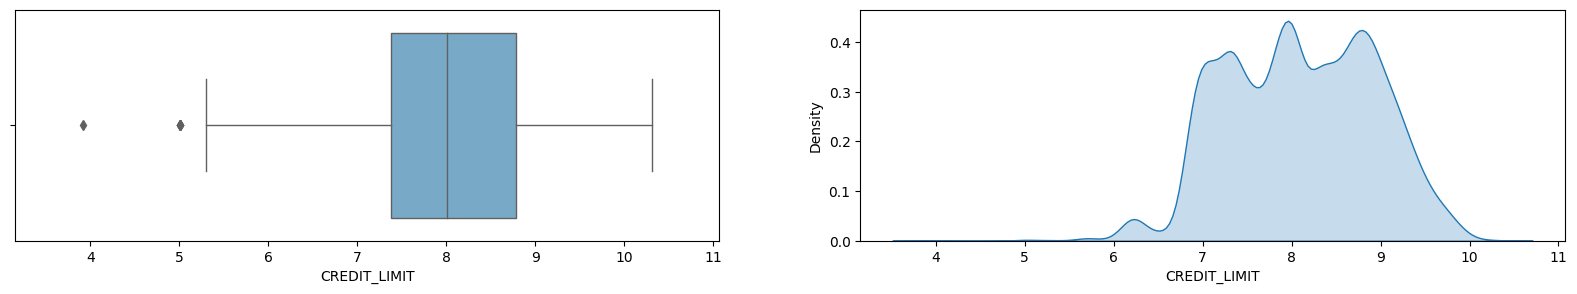

<Figure size 2000x300 with 0 Axes>

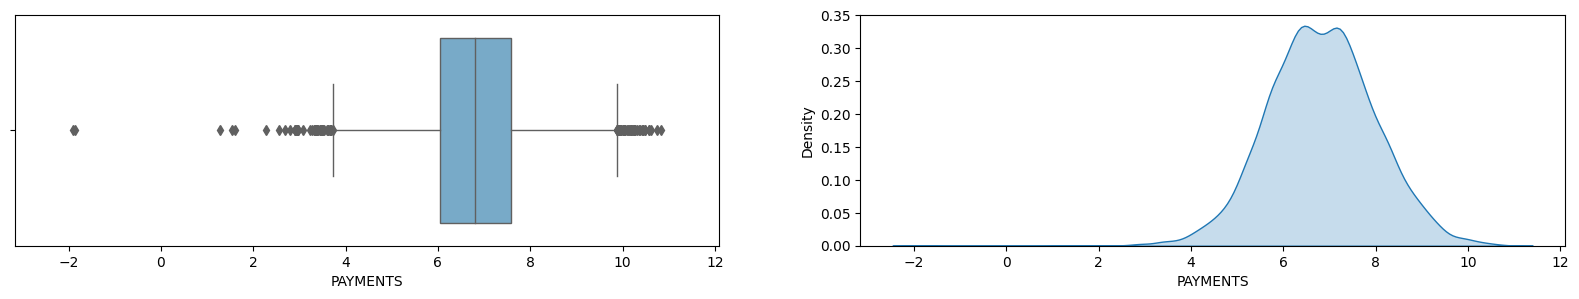

<Figure size 2000x300 with 0 Axes>

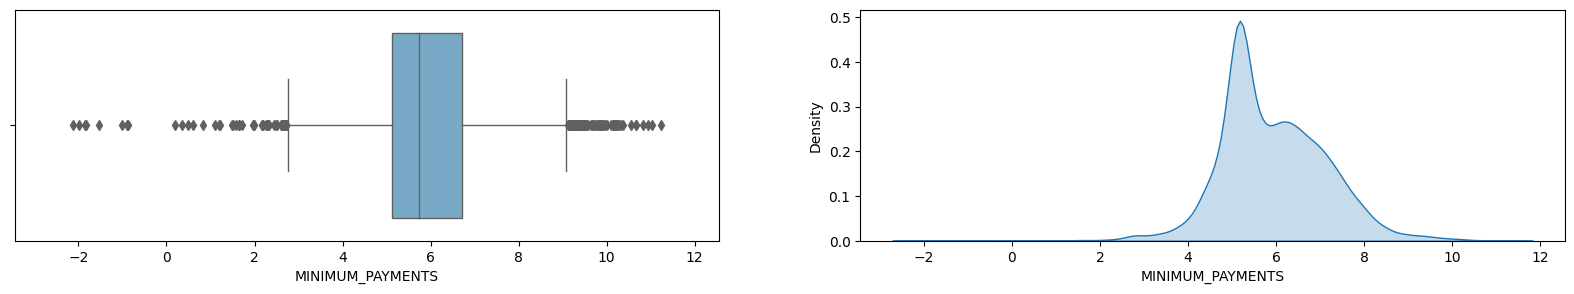

<Figure size 2000x300 with 0 Axes>

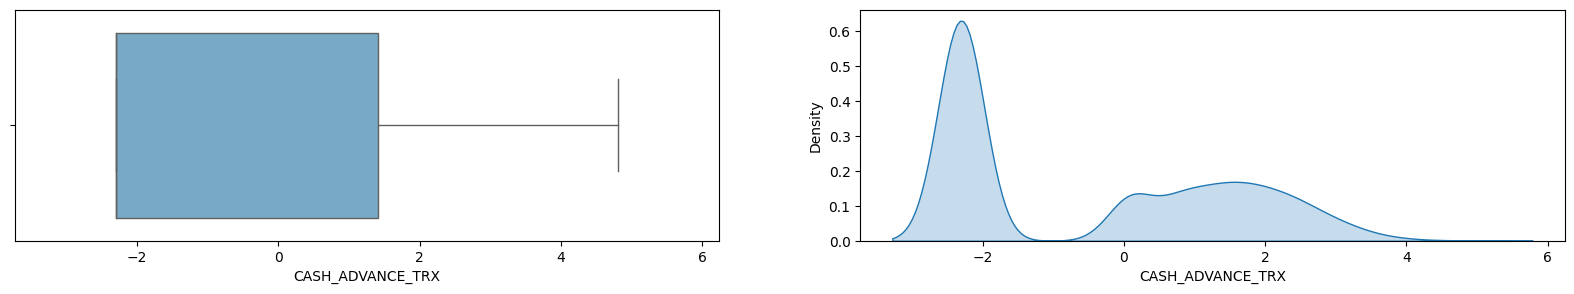

<Figure size 2000x300 with 0 Axes>

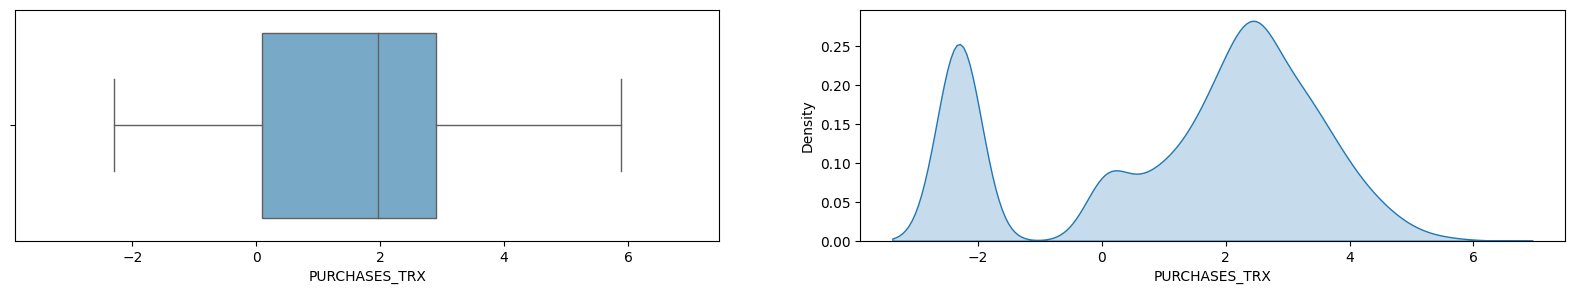

In [20]:
for col in list(df_copy[skewness_features].columns):
    if df_copy[col].nunique() > 7:
        plt.figure();
        rcParams['figure.figsize'] = (20, 3);
        fig, (ax_box, ax_kde) = plt.subplots(ncols=2, sharex=True);
        plt.gca().set(xlabel=col, ylabel='Density');
        sns.boxplot(x = col, ax=ax_box, linewidth=1.0, palette='Blues', data=df_copy);  # Switched x to y
        sns.kdeplot(df_copy[col], ax=ax_kde, fill=True, palette='Blues');
        plt.show();

- ### I've made improvements of skewness features relative to the initial state.


 ### The data is now prepared for experimentation with the algorithms. And before determining the best algorithm to use, I want to explore the optimal number of clusters to employ for testing the algorithms.

### Applying T-SNE and Elbow Method  to  choose the correct clusters

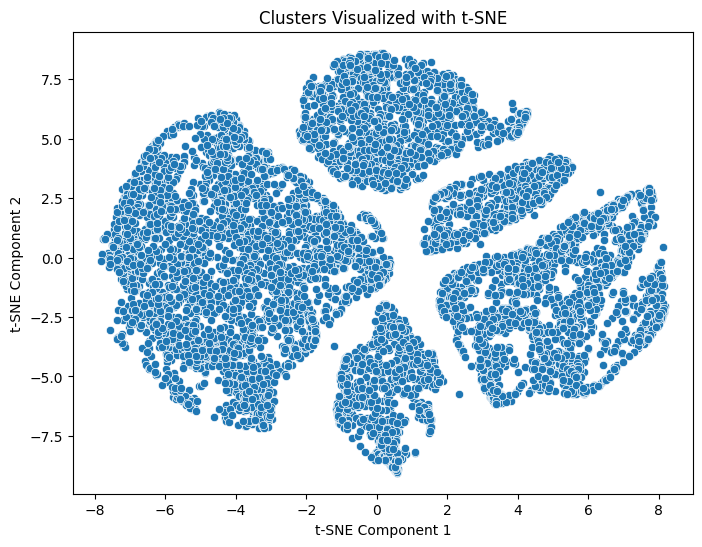

In [21]:
# Apply t-SNE to reduce dimensions to 2 for visualization
rcParams['figure.figsize'] = (8, 6);
tsne = TSNE(n_components=2,  perplexity=30, learning_rate=0.1, n_iter=2000)
X_tsne = tsne.fit_transform(df_copy)

# Add the cluster information to the reduced data
df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=df_tsne)
plt.title('Clusters Visualized with t-SNE')
plt.show()

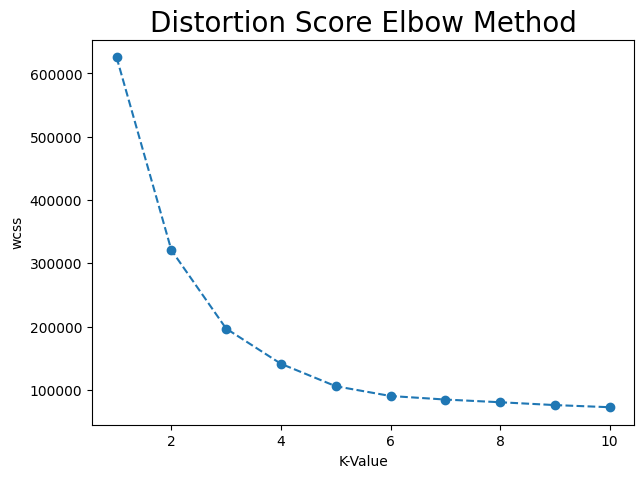

In [22]:
rcParams['figure.figsize'] = (7, 5);
wcss= []

for i in range(1,11): 
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    km.fit(df_copy)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss, marker='o', linestyle='--')
plt.title('Distortion Score Elbow Method', fontsize =20)
plt.xlabel('K-Value')
plt.ylabel('wcss')
plt.show()

### - From all of the above, the optimal Clusters are 5.

# <a name="5">K Means</a>


In [23]:
# Number of clusters (K)
n_clusters = 5

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=n_clusters )

# Fit the model to the scaled data
kmeans.fit(df_copy)

KMeans(n_clusters=5)

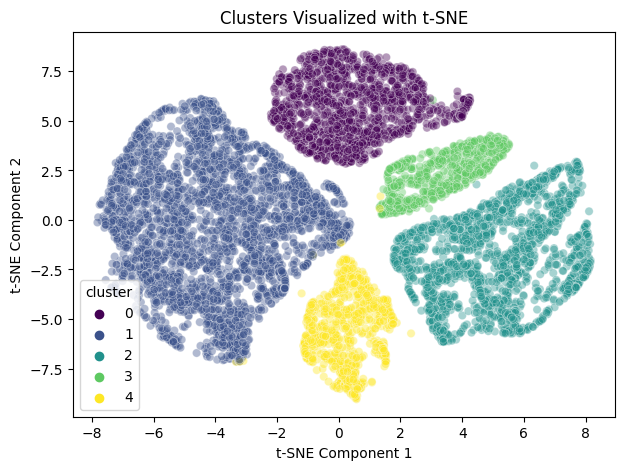

In [24]:
# Add the cluster information to the reduced data
df_tsne['cluster'] = kmeans.labels_

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne, palette='viridis', alpha=0.4 )
plt.title('Clusters Visualized with t-SNE')
plt.show()

# <a name="5"> Hierarchial Clustering</a>


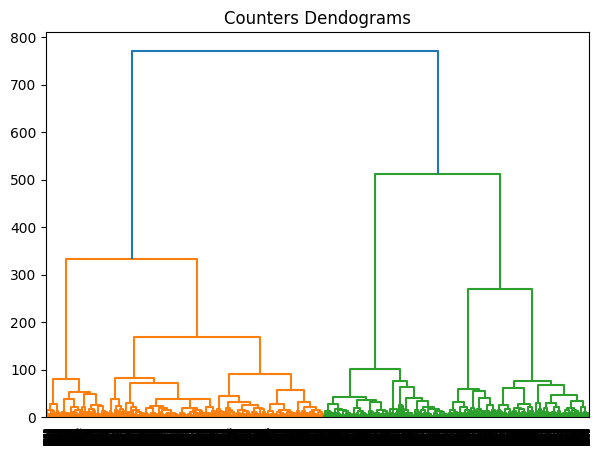

In [25]:
import scipy.cluster.hierarchy as shc
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_copy ,
                                  method='ward',
                                  metric='euclidean'),
                        orientation='top')

In [26]:
# Number of clusters (K)
n_clusters = 5

# Initialize the AgglomerativeClustering model
hier_model = AgglomerativeClustering(n_clusters=n_clusters)
hier_model.fit(df_copy)

AgglomerativeClustering(n_clusters=5)

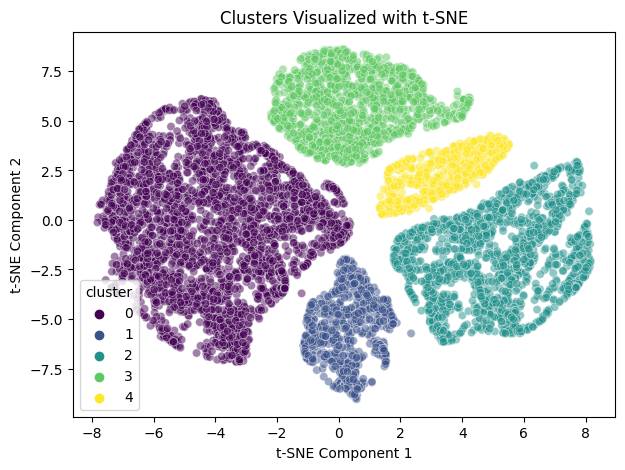

In [27]:
# Add the cluster information to the reduced data
df_tsne['cluster'] = hier_model.labels_

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne, palette='viridis', alpha=0.5)
plt.title('Clusters Visualized with t-SNE')
plt.show()

#  <a name="5">GaussianMixture</a>

In [28]:
# Number of clusters (K)
n_clusters = 5

# Initialize the GaussianMixture model
gaussian_model = GaussianMixture(n_components=n_clusters,covariance_type='full')
labels_ = gaussian_model.fit_predict(df_copy)

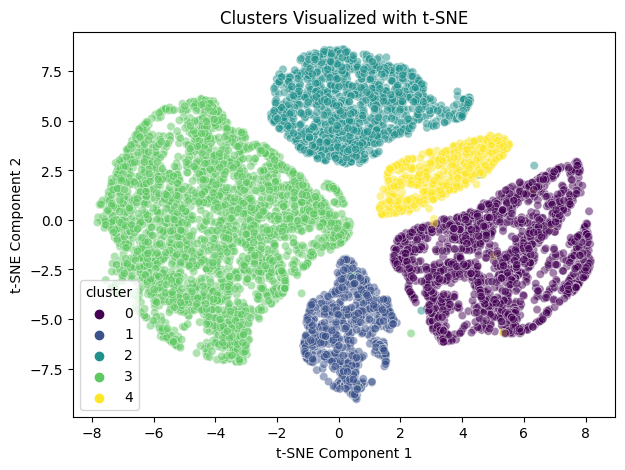

In [29]:

# Add the cluster information to the reduced data
df_tsne['cluster'] = labels_

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne, palette='viridis',alpha=0.5)
plt.title('Clusters Visualized with t-SNE')
plt.show()

#  <a name="5">DBSCAN</a>

In [30]:
# Initialize the DBSCAN model
dbscan = DBSCAN(eps=2.5, min_samples=5).fit(df_copy)

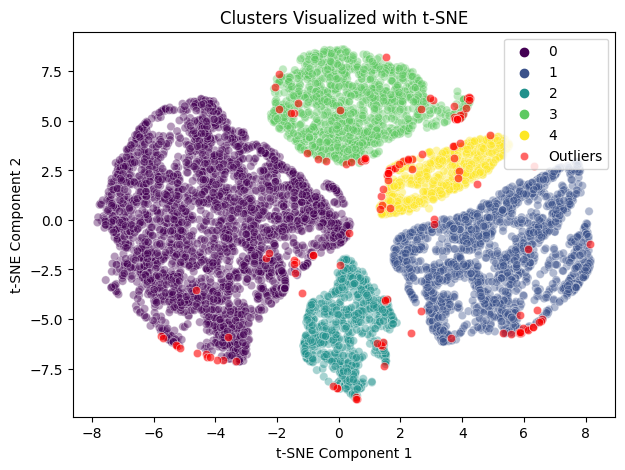

In [31]:
# Add the cluster information to the reduced data
df_tsne['cluster'] = dbscan.labels_

outliers_mask = df_tsne['cluster'] == -1
df_tsne_without_outliers = df_tsne[~outliers_mask]

# Plot clusters with different colors
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne_without_outliers, palette='viridis', alpha=0.4)

# Color outliers (cluster = -1) with a specific color
outliers_mask = df_tsne['cluster'] == -1
sns.scatterplot(x=df_tsne.loc[outliers_mask, 't-SNE Component 1'], 
                y=df_tsne.loc[outliers_mask, 't-SNE Component 2'], 
                color='red', 
                label='Outliers', 
                alpha=0.6)

plt.title('Clusters Visualized with t-SNE')
plt.legend()
plt.show()

## From the algorithms provided, it appears that Hierarchical Clustering has been identified as the most effective model for clustering customers. Now, the next step involves uncovering the business implications associated with each cluster.

In [32]:
final_df = df.copy()
final_df.dropna(inplace=True)
final_df.drop(columns=['CUST_ID'],inplace=True)
final_df['Cluster'] = hier_model.labels_

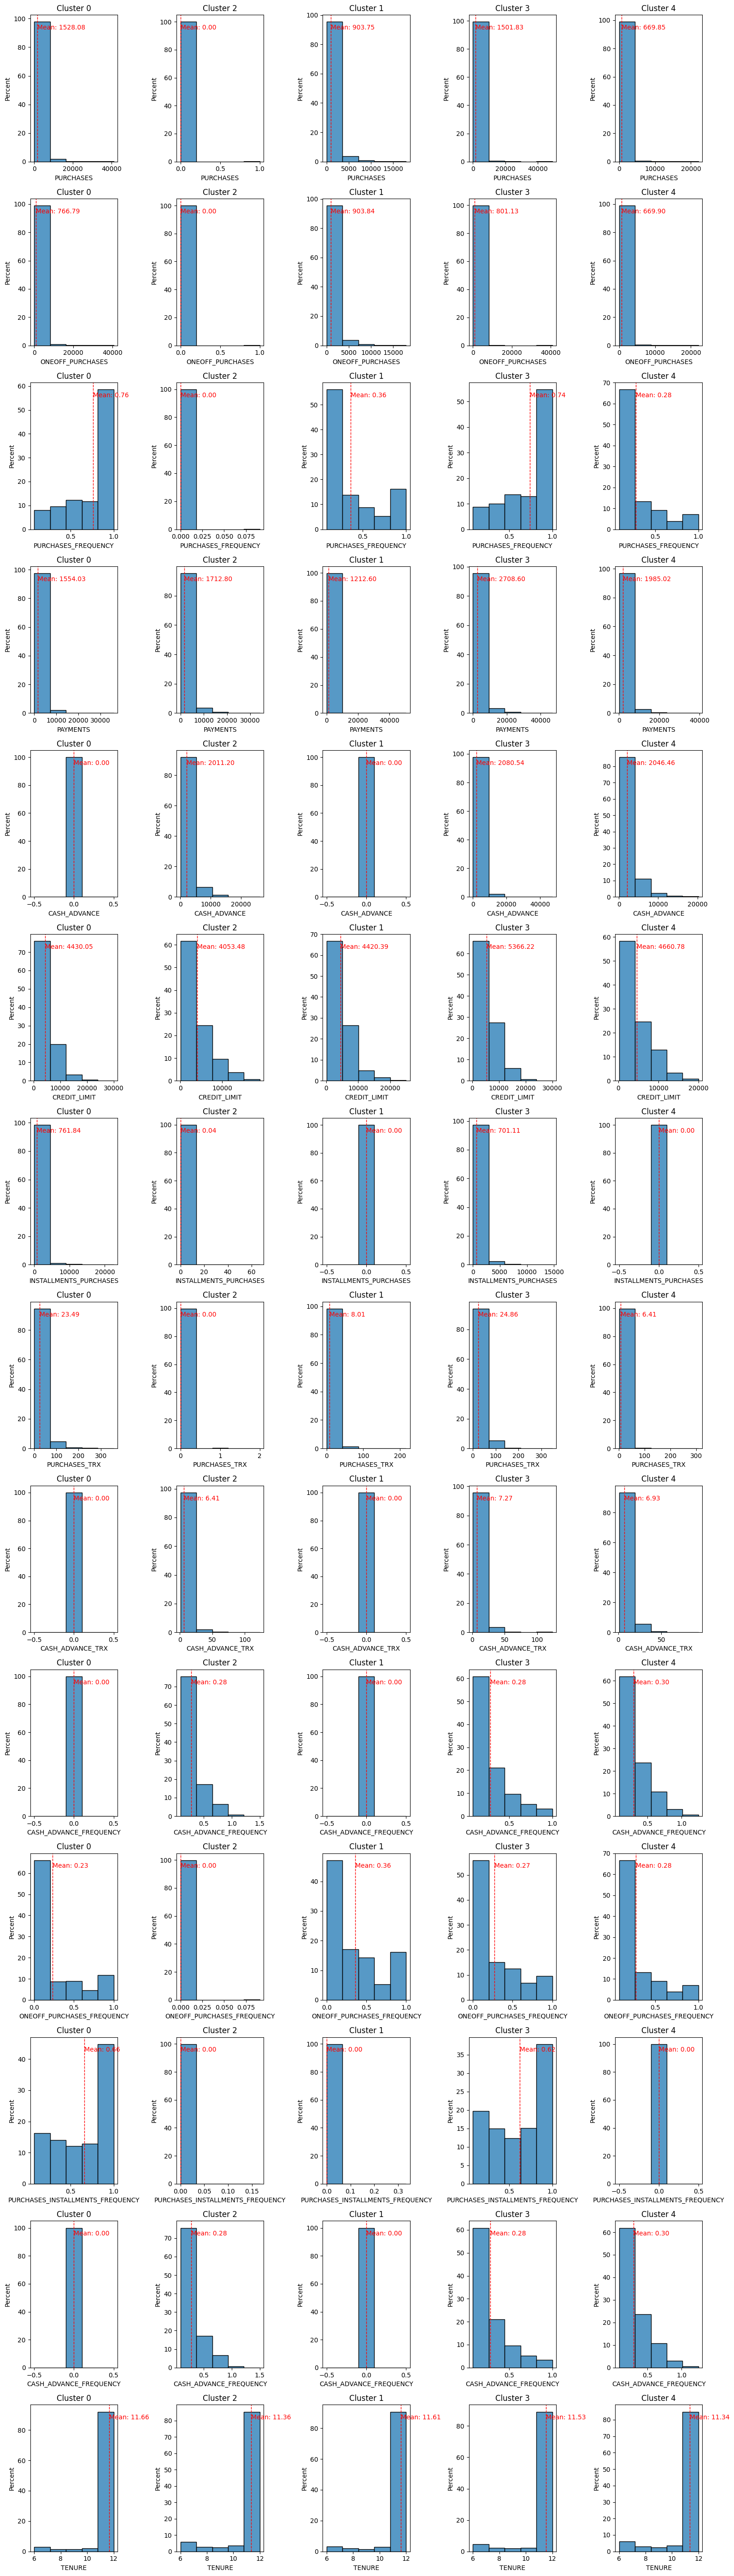

In [33]:
# Define the columns and clusters
cols = ['PURCHASES', 'ONEOFF_PURCHASES' ,'PURCHASES_FREQUENCY','PAYMENTS', 'CASH_ADVANCE','CREDIT_LIMIT' ,'INSTALLMENTS_PURCHASES', 'PURCHASES_TRX',
        'CASH_ADVANCE_TRX', 'CASH_ADVANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'TENURE']
clusters = final_df['Cluster'].unique()

# Set up subplots
num_rows = len(cols)
num_cols = len(clusters)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4*num_rows))

# Loop through each feature
for i, col in enumerate(cols):
    # Loop through each cluster
    for j, cluster in enumerate(clusters):
        # Select data points belonging to the current cluster
        data = final_df[final_df['Cluster'] == cluster][col]
        # Plot histogram for the current cluster in the current subplot
        sns.histplot(data, bins=5, ax=axes[i, j], stat='percent')
        axes[i, j].set_title(f'Cluster {cluster}')
        axes[i, j].set_xlabel(col)
        axes[i, j].set_ylabel('Percent')
        
        # Calculate mean
        mean_value = np.mean(data)
        # Annotate with mean value
        axes[i, j].axvline(mean_value, color='r', linestyle='--', linewidth=1)
        axes[i, j].text(mean_value, axes[i, j].get_ylim()[1]*0.9, f'Mean: {mean_value:.2f}', color='r')

# Adjust layout
plt.tight_layout()
plt.show()


In [34]:
final_df.groupby('Cluster')[cols].mean()

,PURCHASES,ONEOFF_PURCHASES,PURCHASES_FREQUENCY,PAYMENTS,CASH_ADVANCE,CREDIT_LIMIT,INSTALLMENTS_PURCHASES,PURCHASES_TRX,CASH_ADVANCE_TRX,CASH_ADVANCE_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,TENURE
Cluster,,,,,,,,,,,,,,
0,1528.079115,766.787492,0.764942,1554.026491,0.000000,4430.048234,761.836169,23.494015,0.000000,0.000000,0.233335,0.663951,0.000000,11.658102
1,903.747266,903.840636,0.362724,1212.595351,0.000000,4420.388276,0.000000,8.010934,0.000000,0.000000,0.362062,0.000331,0.000000,11.609344
2,0.001050,0.001050,0.000215,1712.802896,2011.201239,4053.483849,0.044115,0.004566,6.410452,0.276716,0.000215,0.000127,0.276716,11.360223
3,1501.831313,801.131614,0.740781,2708.601191,2080.542106,5366.218270,701.114172,24.858413,7.273598,0.282638,0.273117,0.622789,0.282638,11.528728
4,669.853329,669.898303,0.278736,1985.015233,2046.463232,4660.783090,0.000000,6.410622,6.930052,0.297572,0.278628,0.000000,0.297572,11.343264



#  <a name="5">Business meaning of each cluster</a>

## `Cluster 0`

### Customer Behavior Overview:
 - Customers in Cluster 0 demonstrate a preference for making purchases in installments rather than opting for cash advances.
 
### Purchase Behavior:
- The mean amount of purchases made in installments is \$761.84, indicating a significant portion of their spending occurs through installment payments.
- These customers tend to make a high number of purchase transactions, with a mean of approximately 23 transactions.
- Around 76\% of customers in this cluster exhibit frequent purchase behavior, indicating a consistent spending pattern.
- The mean amount of total purchases is \$1528, suggesting that while purchases are frequent, they are moderate in size.
 

## `Cluster 1`

### Customer Behavior Overview:
 - Customers in Cluster 1 exhibit a preference for making one-off purchases rather than opting for installment payments.

### Purchase Behavior:
- The majority of purchases made by customers in this cluster are one-off transactions, indicating a tendency towards lump-sum spending.
- Customers in this cluster generally avoid purchases in installments, suggesting a preference for immediate payment rather than spreading payments over time.
- The number of purchase transactions is relatively lower compared to other clusters, with a mean of approximately 8 transactions.
- Around 36% of customers in this cluster demonstrate frequent purchase behavior, indicating a moderate level of spending activity.
- The mean amount of total purchases is \$903, reflecting the tendency for one-off purchases with a moderate spending amount.


## `Cluster 2` :

### Customer Behavior Overview:
 - Customers in Cluster 2 demonstrate a preference for using cash advances rather than making purchases in installments.

### Purchase Behavior:
 - The majority of purchases made by customers in this cluster are through cash advances, indicating a reliance on immediate funds rather than installment payments.
 - None of the customers in this cluster demonstrate frequent purchase behavior, suggesting a preference for infrequent or one-time spending.

### Cash Advance:
- The mean amount of cash advances taken by customers in this cluster is $2011. This suggests that, on average, customers in Cluster 2 rely on relatively large cash advances to meet their immediate financial needs. It indicates a pattern of substantial cash flow requirements or perhaps unexpected expenses among this group of customers.


## `Cluster 3`
### Customer Behavior Overview:
 - Customers in Cluster 3 demonstrate a preference for making purchases both in installments and through cash advances.

### Purchase Behavior:
 - The mean amount of purchases made in installments is \$701.84, indicating a significant portion of their spending occurs through installment payments.
 - These customers tend to make a high number of purchase transactions, with a mean of approximately 25 transactions.
 - Around 74% of customers in this cluster exhibit frequent purchase behavior, indicating a consistent spending pattern.
 - The mean amount of total purchases is $1501, suggesting that while purchases are frequent, they are moderate in size.
 
### Cash Advance:
 - The mean amount of cash advances taken by customers in this cluster is \$2080.54, suggesting a reliance on immediate funds for their purchases.

## `Cluster 4`
### Customer Behavior Overview:
 - Customers in Cluster 4 demonstrate a preference for using cash advances rather than making purchases in installments.
 
### Purchase Behavior:
 - The mean amount of purchases made by customers in this cluster is \$669, indicating a moderate level of spending on purchases.
 - Customers in this cluster tend to make fewer purchase transactions, with a mean of approximately 6 transactions.
 - Around 27\% of customers in this cluster exhibit frequent purchase behavior, suggesting a preference for infrequent spending or one-time purchases.
 
### Cash Advance:
- The mean amount of cash advances taken by customers in this cluster is \$2046.54. This suggests that customers in Cluster 4 rely heavily on cash advances to meet their financial needs, indicating potential financial instability or unexpected expenses among this group of customers.